In [1]:
from selenium import webdriver
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
driver = webdriver.Chrome('./chromedriver')
driver.get("https://www.nautiljon.com/animes/%C3%A9t%C3%A9-2020.html?tri=p")

In [3]:
title_elements = driver.find_elements_by_css_selector('.elt .title h2')
titles = [element.get_attribute('innerText') for element in title_elements]

In [4]:
info_elements = driver.find_elements_by_css_selector('.elt .infos_top')
types = []
origins = []

for info_element in info_elements:
    infos = info_element.find_elements_by_css_selector('.infos span')
    types.append(infos[0].get_attribute('innerHTML'))
    if len(infos) > 6:
        origins.append(infos[6].get_attribute('innerText'))
    else:
        origins.append('Non défini')

In [5]:
note_elements = driver.find_elements_by_css_selector('.infos2')
notes = [note_element.find_elements_by_css_selector('span')[1].get_attribute('innerText') for note_element in note_elements]

In [6]:
import pandas as pd

In [7]:
dataset = pd.DataFrame({
    "title": titles,
    "type":  types,
    "origin": origins,
    "note": notes
})

dataset.note = (dataset.note
.str.replace('/10', '')
.str.replace('-', 'NaN').astype(float))

In [8]:
dataset["rate"] = pd.cut(dataset.note, bins=[0, 5, 6, 8, 10], labels= ['Nul', 'Moyen','Bon', 'Très bon'])

In [9]:
dataset.to_csv('./anime_summer_2020.csv')

In [10]:
dataset_rating = dataset.groupby(["origin"])["rate"].value_counts().unstack().fillna(0.0).astype("int")

<AxesSubplot:xlabel='origin'>

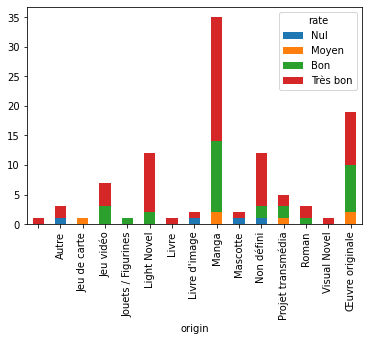

In [11]:
dataset_rating.plot(kind="bar", stacked=True)

In [12]:
dataset_rating.to_csv('./anime_rating_by_type_summer_2020.csv')

In [13]:
driver.close()